# Investigate Hotel Business Using Data Visualization (Edited)

by Mochamad Galuh Saputra

## **Tugas 1 Data Preprocessing**
**Output :**
Data Siap Digunakan Untuk Analisis

**Langkah - langkah :**
1. Download file "Dataset"
2. Mengatasi data null
Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode
yang tepat.
3. Mengganti value yang tidak sesuai
Hint: Perhatikan kolom "meal"
4. Membuang data yang tidak diperlukan
Hint: Perhatikan total jumlah tamu untuk setiap pemesanan


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
path = "/content/drive/MyDrive/Bootcamp Data Science Rakamin/hotel_bookings_data.csv"
df = pd.read_csv(path)
df.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
56801,City Hotel,1,148,2018,November,38,14,0,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,86.0,NaN,107,Family,130.0,0,0,Canceled
113971,City Hotel,0,50,2019,August,24,11,2,2,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,126.0,0,0,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handle Missing Values

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

There are 4 columns missing values. that are ('children', 'city', 'agent', 'company')
with assumption that
1. The 'children' column contains NaN values, which indicate that there are customers who didn't bring any children. Therefore, we will assign a value of 0 to it.
2. The 'city' column also contains NaN values. We will fill these with 'Unknown' since there are no existing 'other' values in the 'city' column.
3. As for the 'agent' and 'company' columns, we will fill them with 0, indicating that the customers didn't use travel agents or are not affiliated with any company.







In [ ]:
df['children'] = df['children'].fillna(0)

df['city'] = df['city'].fillna('Other')

df['agent'] = df['agent'].fillna(0)

df['company'] = df['company'].fillna(0)

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Mengganti Value Tidak Sesuai
- Cek nilai unik kolom "meal"
- Ada label "Undefined"
- Menurt temen - temen, label tersebut diganti dengan nilai apa ?

## Handle Data Types And Inappropriate Value

The data type of ('children','agent','company') column are float, We change it to integer.

In [ ]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [ ]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

I assumed that Undefined as No Meal

In [ ]:
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Membuang Data yang Tidak Diperlukan
- Membuat data yang nilai kosongnya banyak
- Jumlah Tamu (?)

## Remove unneccessary data

In [ ]:
df.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
89718,City Hotel,0,44,2018,July,22,23,1,1,2,0,0,Breakfast,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0,0,0,Personal,0.0,0,1,Check-Out
70948,City Hotel,1,213,2019,August,26,26,1,1,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,323,0,0,Personal,115.0,0,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

Create new column 'total_guests' from the combination of ('adults', 'children', 'babies') columns

Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'

Remove the data for which stay duration = 0 & total_guest = 0

Remove Data duplicates

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
#print('0 guests {0} out of {1} all guests'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
#print('0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))

df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

df_clean = df_clean.drop_duplicates()

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

before pre-processing: 119390
after pre-processing: 85378


## **Tugas 2 Monthly Hotel Booking Analysis Based on Hotel Type**
**Output :**
Analisis dalam periode bulan / musim terhadap trend jumlah reservasi berdasarkan tipe hotel

**Langkah - langkah :**
1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap
bulannya berdasarkan jenis hotel
Hint: Perhatikan data tahun kedatangan
2. Lakukan normalisasi data
Hint: Perhatikan data bulan September dan Oktober
3. Urutkan data berdasarkan bulan
Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari
jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
Hint: Perhatikan jenis plot yang digunakan
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya
Hint: Perhatikan hari libur di Indonesia

#### Tabel Agregat
- Buat tabel agregat yang berisi bulan, tahun, jumlah reservasi dan jenis hotel
  - Tabel agregat bisa dibuat pakai metode .pivot_table()
  - Jumlah Reservasi dihitung pakai Count

## Tabel Aggregation

In [ ]:
df_clean['is_canceled'].value_counts()

0    61681
1    23697
Name: is_canceled, dtype: int64

In [ ]:
df_agg = df_clean.groupby(['hotel','arrival_date_month','arrival_date_year']).agg({'agent':'count'})
df_agg.rename(columns={'agent':'num_booking'}, inplace=True)
df_agg

num_booking
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      1608
                                2019                      1906
             August             2018                      2215
                                2019                      2693
             December           2017                      1439
                                2018                      2570
             February           2017                       988
                                2018                      1964
             January            2017                       753
                                2018                      2096
             July               2018                      2290
                                2019                      3031
             June               2018                      2376
                                2019                      2641
             March              2018                      1004
                                2019                      1670
             May                2018                      2340
                                2019                      2437
             November           2017                      1531
                                2018                      2509
             October            2017                      1051
                                2018                      2774
                                2019                      2648
             September          2017                       370
                                2018                      2447
                                2019                      2840
Resort Hotel April              2018                      1124
                                2019                      1329
             August             2018                      1197
                                2019                      1508
             December           2017                      1090
                                2018                      1528
             February           2017                       923
                                2018                      1121
             January            2017                       831
                                2018                      1164
             July               2018                      1374
                                2019                      1489
             June               2018                      1313
                                2019                      1443
             March              2018                       798
                                2019                      1106
             May                2018                      1419
                                2019                      1166
             November           2017                      1132
                                2018                      1254
             October            2017                      1329
                                2018                      1585
                                2019                      1701
             September          2017                      1258
                                2018                      1349
                                2019                      1656

Terdapat perbedaan tahun di bulan Oktober dan September. untuk mengetahui total pengunjung di bulan tersebut dalam semua tahun, perlu di normalisasi perhitungan jumlah pengunjung per bulannya.

#### Normalisasi Data

In [ ]:
df1 = df_clean.copy()
# Using group by to aggregate the data to count monthly hotel booking based on hotel type
df1_agg = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_agg.columns = ['hotel_type', 'arrival_month', 'total_year', 'num_booking'] # change the columns' name

# Normalize the data to calculate average monthly booking
df1_agg['average_num_booking'] = round(df1_agg['num_booking']/df1_agg['total_year']).astype('int64')

df1_agg

,hotel_type,arrival_month,total_year,num_booking,average_num_booking
0,City Hotel,April,2,3514,1757
1,City Hotel,August,2,4908,2454
2,City Hotel,December,2,4009,2004
3,City Hotel,February,2,2952,1476
4,City Hotel,January,2,2849,1424
5,City Hotel,July,2,5321,2660
6,City Hotel,June,2,5017,2508
7,City Hotel,March,2,2674,1337
8,City Hotel,May,2,4777,2388
9,City Hotel,November,2,4040,2020


#### Urutkan Data Berdasarkan Bulan
- Panggil kembali tabel agregat yang telah dibuat sebelumnya
- Diurutkan berdasarkan bulan
  - Disarankan bulan diubah jadi angka
  - Kemudian diurutkan dengan dari yang paling kecil

In [ ]:
#Create new column as month and take first 3 words of month
df1_agg['month'] = df1_agg['arrival_month'].str[:3]
#sort the data by month
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df1_agg['month'] = pd.Categorical(df1_agg['month'], categories=month, ordered=True)
df1_agg = df1_agg.sort_values(by=['hotel_type','month']).reset_index(drop=True)
df1_agg2 = df1_agg[['hotel_type','month','average_num_booking']]
df1_agg2

,hotel_type,month,average_num_booking
0,City Hotel,Jan,1424
1,City Hotel,Feb,1476
2,City Hotel,Mar,1337
3,City Hotel,Apr,1757
4,City Hotel,May,2388
5,City Hotel,Jun,2508
6,City Hotel,Jul,2660
7,City Hotel,Aug,2454
8,City Hotel,Sep,1886
9,City Hotel,Oct,2158


#### Plot yang Dapat Menunjukkan Trend Reservasi Hotel per Bulan Berdasarkan Tipe Hotel
- Disarankan pakai Line Chart
- Yang penting bisa memvisualisasikan trend reservasi hotel 'City Hotel' dan reservasi hotel 'Resort Hotel'

## Create Visualization

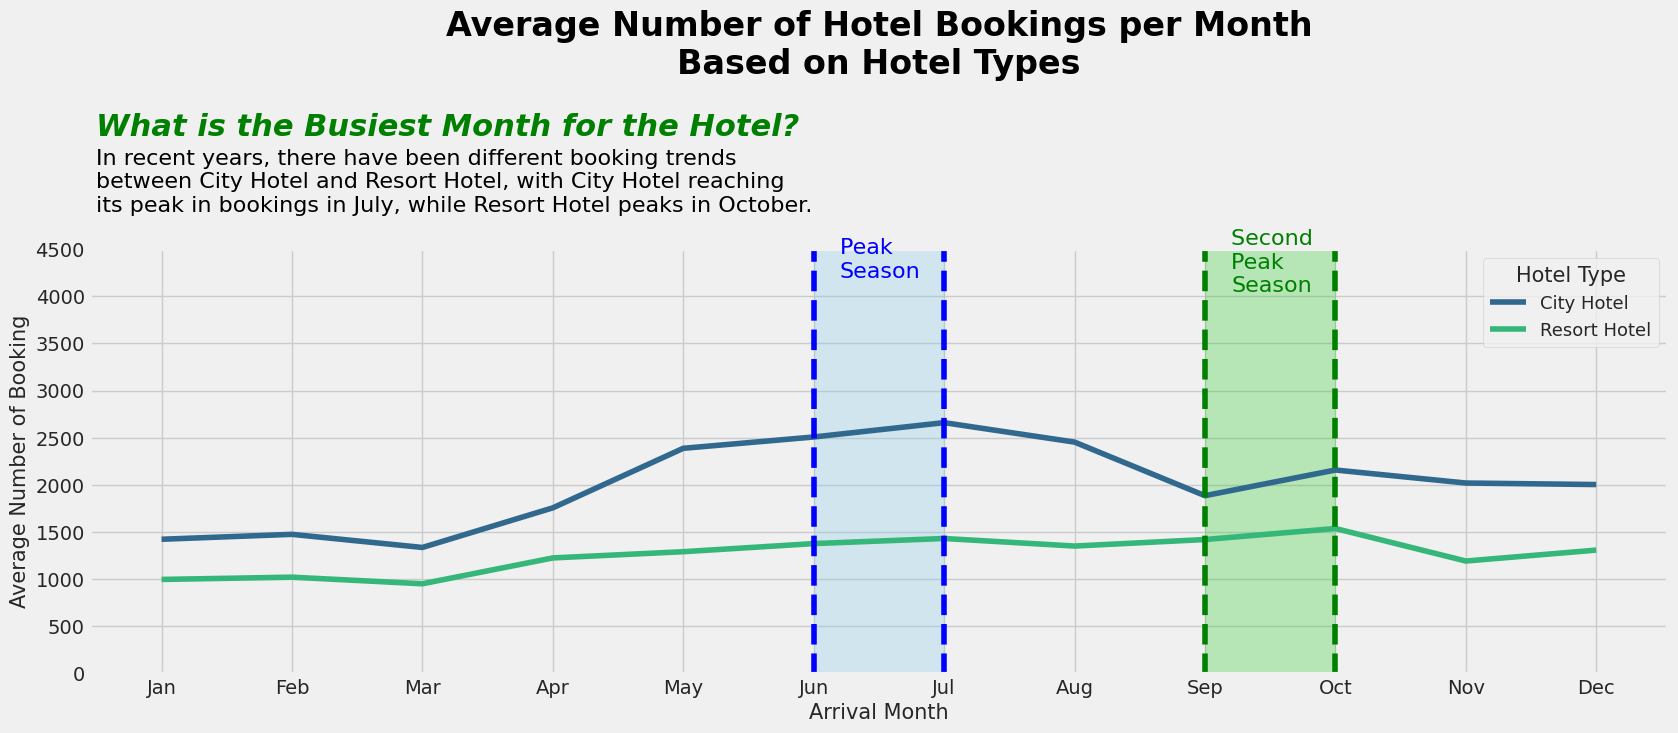

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Types", fontsize=24, color='black', weight='bold', pad=65, y=1.2)
sns.lineplot(x='month', y='average_num_booking', data=df1_agg2, hue='hotel_type', palette='viridis')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0, 4500)

plt.axvline(5, ls='--', color='blue')
plt.axvline(6, ls='--', color='blue')
plt.text(x=5.2, y=4200, s='Peak \nSeason', fontsize=16, color='blue')
plt.stackplot(np.arange(5,7,1), [[4800]], color='skyblue', alpha=0.3)

plt.axvline(8, ls='--', color='green')
plt.axvline(9, ls='--', color='green')
plt.text(x=8.2, y=4050, s='Second \nPeak \nSeason', fontsize=16, color='green')
plt.stackplot(np.arange(8,10,1), [[4800]], color='limegreen', alpha=0.3)


plt.text(x=-0.5, y=5700, s='What is the Busiest Month for the Hotel?', fontsize=22, fontweight='bold', color='green', fontstyle='italic')
plt.text(x=-0.5, y=4900, s='In recent years, there have been different booking trends \nbetween City Hotel and Resort Hotel, with City Hotel reaching \nits peak in bookings in July, while Resort Hotel peaks in October.', fontsize=16, color='black')
plt.tight_layout()

#### Interpretasi
- Bisa dianalisis puncak trend di setiap jenis hotel terjadi kapan
- Apakah trendnya bersifat flukuatif ? atau secara terus menerus mengelami kenaikan atau penurunan ?
- Mengapa trend naik di bulan X ? kenapa turun di bulan Y ? asumsi aja yang sekiranya bisa masuk di logika. atau pakai data jgua boleh

Dari visualisasi diatas saya menganalisis rata-rata jumlah pemesanan hotel di tiap bulannya berdasarkan jenis hotel. Terdapat dua jenis hotel, yaitu Resort Hotel dan City Hotel. Masing-masing hotel diberi warna berbeda di dalam visualisasinya.

Terdapat hal menarik dimana bulan tersibuk untuk City Hotel terdapat pada bulan Juni hingga Juli. Kedua bulan ini seringkali menjadi periode panjang musim libur sekolah di Indonesia. Dikarenakan anak sekolah libur, seringkali orang tua mengajak anaknya untuk berlibur.Lalu bulan tersibuk untuk Resort Hotel adalah bulan September hingga Oktober. Di bulan ini dikarenakan cuaca yang sangat mendukung untuk berlibur dikarenakan adanya peralihan dari musim kemarau ke musim hujan.

Dengan adanya hari libur panjang, tentu pemesanan akan semakin meningkat. Oleh karenanya, di bulan sibuk tersebut perlu dilakukan suatu penanganan/pencegahan agar tidak rating hotel tidak menurun.

## **Tugas 3 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**
**Output :**
Analisis bagaimana korelasi antara Durasi Menginap terhadap status pembatalan reservasi

**Langkah - langkah**
1. Buatlah kolom baru yang berisi total durasi menginap.
Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih
signifikan
Hint: Perhatikan persebaran datanya
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang
dibatalkan terhadap durasi menginap untuk setiap jenis hotel
Hint: Perhatikan proporsi dari pemesanan yang dibatalkan
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi
menginap untuk setiap tipe hotel
Hint: Perhatikan jenis plot yang digunakan
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya
Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan
pemesanan hote

#### Kolom Baru Total Durasi Menginap
- Angka total durasi menginap bisa melihat kolom day stays weekend & night stays weekdays
- Dua kolom dijumlahkan

In [ ]:
df2 = df_clean.copy()

#### Kelompokkan nilai dari kolom total durasi menginap
- Pengekelompokkkan bisa pakai < atau > mean
- Bisa pakai kategori custom
  - Seperti kat 1 = 1 - 5 malam, 2 = 6 - 10 malam, dst
- Perhatikan persebaran data

In [ ]:
duration = []
for i in df2['stay_duration']:
  if i >0 and i<=7:
    group = '1 Week'
  elif i >=8 and i<=14:
    group = '2 Weeks'
  elif i >=15 and i<=21:
    group = '3 Weeks'
  elif i >=22 and i<=28:
    group = '4 Weeks'
  else :
    group = 'long stay'
  duration.append(group)
df2['stay_duration_group'] = duration

In [ ]:
df2['stay_duration_group'].value_counts()

1 Week       80560
2 Weeks       4459
3 Weeks        234
4 Weeks         81
long stay       44
Name: stay_duration_group, dtype: int64

In [ ]:
df_agg2 = df2.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_agg2.rename(columns={'agent':'num_booking'}, inplace=True)

df_sum2 = df_agg2.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'})
df_sum2.rename(columns={'num_booking':'sum_booking'}, inplace=True)

df_agg3 = df_agg2.merge(df_sum2, on=['hotel', 'stay_duration_group'])
df_agg3

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking
0,City Hotel,1 Week,0,35845,51037
1,City Hotel,1 Week,1,15192,51037
2,City Hotel,2 Weeks,0,486,1009
3,City Hotel,2 Weeks,1,523,1009
4,City Hotel,3 Weeks,0,27,100
5,City Hotel,3 Weeks,1,73,100
6,City Hotel,4 Weeks,0,4,25
7,City Hotel,4 Weeks,1,21,25
8,City Hotel,long stay,0,2,20
9,City Hotel,long stay,1,18,20


In [ ]:
df_agg3['rate'] = round((df_agg3['num_booking']/df_agg3['sum_booking'])*100, 2)
df_agg3

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,rate
0,City Hotel,1 Week,0,35845,51037,70.23
1,City Hotel,1 Week,1,15192,51037,29.77
2,City Hotel,2 Weeks,0,486,1009,48.17
3,City Hotel,2 Weeks,1,523,1009,51.83
4,City Hotel,3 Weeks,0,27,100,27.00
5,City Hotel,3 Weeks,1,73,100,73.00
6,City Hotel,4 Weeks,0,4,25,16.00
7,City Hotel,4 Weeks,1,21,25,84.00
8,City Hotel,long stay,0,2,20,10.00
9,City Hotel,long stay,1,18,20,90.00


#### Tabel Agregat Menunjukkan Perbandingan Jumlah Pesanan Hotel Dibatalkan Terhadap Lama Menginap
- Melihat angka jumlah pesanan hotel dibatalkan bisa melihat kolom 'Is_canceled' atau 'Reservation_status'
- Tabel Agregat bisa dibuat pakai metode .pivot_table()


In [ ]:
# pick only canceled order
df_agg3_plot = df_agg3[df_agg3['is_canceled']==1].sort_values('hotel', ascending=True).reset_index(drop=True)
df_agg3_plot

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,rate
0,City Hotel,1 Week,1,15192,51037,29.77
1,City Hotel,2 Weeks,1,523,1009,51.83
2,City Hotel,3 Weeks,1,73,100,73.00
3,City Hotel,4 Weeks,1,21,25,84.00
4,City Hotel,long stay,1,18,20,90.00
5,Resort Hotel,1 Week,1,6858,29523,23.23
6,Resort Hotel,2 Weeks,1,939,3450,27.22
7,Resort Hotel,3 Weeks,1,47,134,35.07
8,Resort Hotel,4 Weeks,1,20,56,35.71
9,Resort Hotel,long stay,1,6,24,25.00


#### Plot yang Menunjukkan Pengaruh Rasio Pembatalan Terhadap Durasi Menginap
- Bisa pakai Boxplot atau pakai Distribution plot
  - Boxplot = Sumbu X Status pembatalan, Sumbu Y durasi, hue Tipe Hotel
- Intinya plot yang memvisualisasikan rasio pembatalan dan durasi menginap yang diklasifikasikan berdasarkan tipe hotel

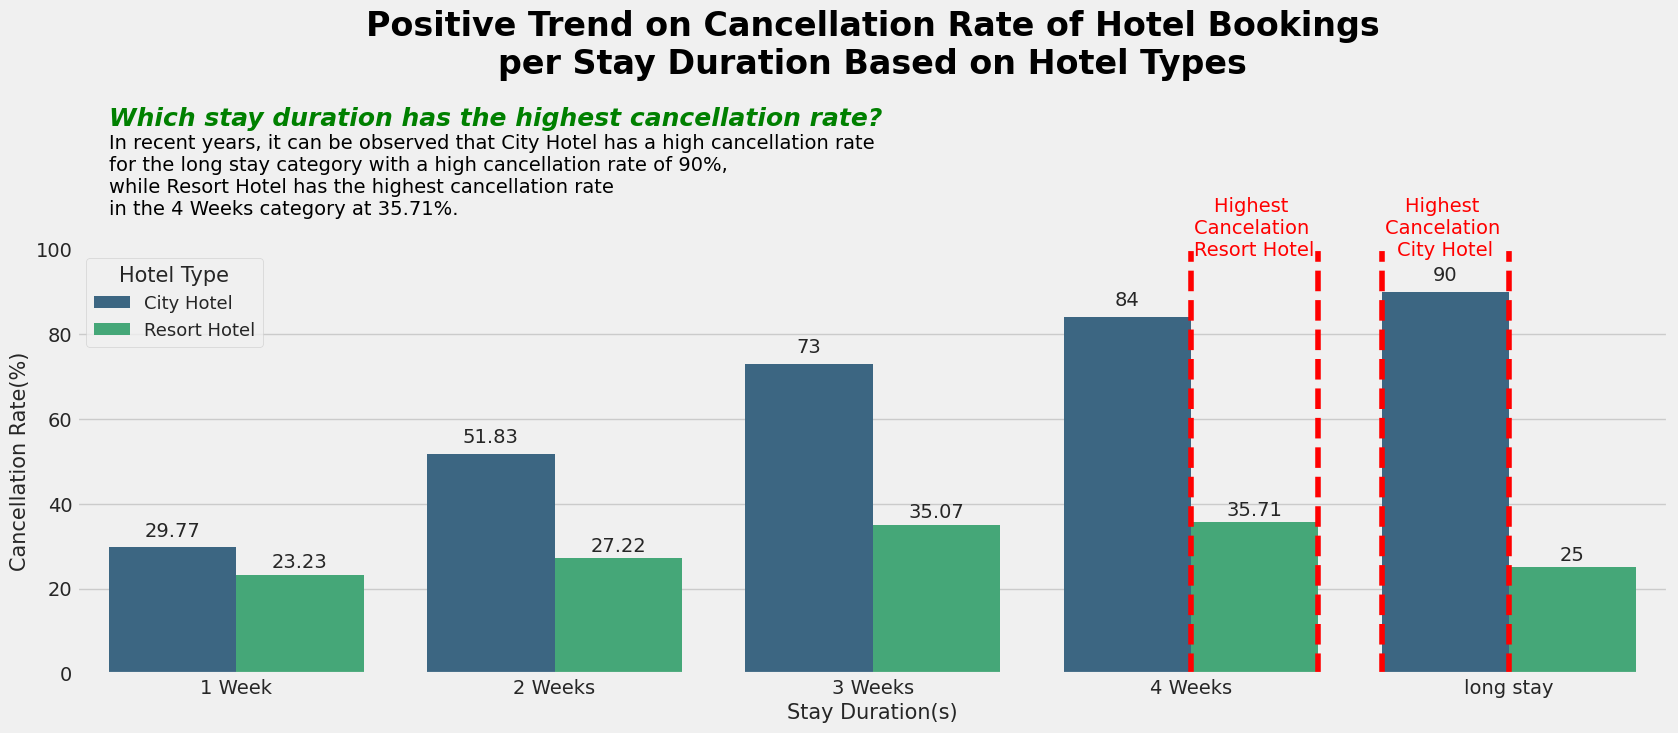

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.title("Positive Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Based on Hotel Types", fontsize=24, color='black', weight='bold', pad=65, y=1.2)
sns.barplot(x='stay_duration_group', y='rate', data=df_agg3_plot, hue='hotel', edgecolor='none', palette='viridis')
plt.ylim(0, 100)
#sns.regplot(x=np.arange(0, len(df_agg3_plot[df_agg3_plot['hotel'] == 'City Hotel'])), y='rate',
#            data=df_agg3_plot[df_agg3_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
#sns.regplot(x=np.arange(0, len(df_agg3_plot[df_agg3_plot['hotel'] == 'City Hotel'])), y='rate',
#            data=df_agg3_plot[df_agg3_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

#plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
#plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='center left')

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.6, ls='--', color='red')
plt.axvline(4, ls='--', color='red')
plt.text(x=3.8, y=105, s='Highest \nCancelation \nCity Hotel', fontsize=14, color='red',  ha='center', va='center')

plt.axvline(3, ls='--', color='red')
plt.axvline(3.4, ls='--', color='red')
plt.text(x=3.2, y=105, s='Highest \nCancelation \nResort Hotel', fontsize=14, color='red',  ha='center', va='center')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='best')
plt.xlabel('Stay Duration(s)', fontsize=15)
plt.ylabel('Cancellation Rate(%)', fontsize=15)

plt.text(x=-0.4, y=129, s='Which stay duration has the highest cancellation rate?', fontsize=18, fontweight='bold', color='green',fontstyle='italic')
plt.text(x=-0.4, y=108, s='In recent years, it can be observed that City Hotel has a high cancellation rate \nfor the long stay category with a high cancellation rate of 90%, \nwhile Resort Hotel has the highest cancellation rate \nin the 4 Weeks category at 35.71%.', fontsize=14, color='black')
plt.tight_layout()


#### Interpretasi
- Apakah durasi menginap terlihat lebih sebentar pada pelanggan yang membatalkan reservasi ?
- Apa fenomena yang mungkin terjadi dibalik peristiwa X ?

Data menunjukkan bahwa ada dua jenis hotel, yaitu `City Hotel` dan `Resort Hotel`. Kedua jenis hotel ini memiliki karakteristik yang berbeda dalam hal pemesanan dan tingkat pembatalan.

Kemudian, data dibagi berdasarkan durasi tinggal, dengan beberapa kategori, termasuk `1 Week`, `2 Weeks`, `3 Weeks`, `4 Weeks`, dan `long stay`. Dari Visualisasi di atas, Durasi tinggal memainkan peran penting dalam tingkat pembatalan, dengan beberapa durasi tinggal memiliki tingkat pembatalan yang lebih rendah daripada yang lain.

Salah satu temuan menarik adalah bahwa tingkat pembatalan dapat bervariasi secara signifikan antara jenis hotel dan durasi tinggal. Terlihat bahwa durasi tinggal di `City Hotel`dengan label "long stay" memiliki tingkat pembatalan yang sangat tinggi, yaitu sebesar 90.00%, sementara `Resort Hotel` memiliki tingkat pembatalan tertinggi di `4 Weeks`sekitar 35.71%.

Seperti analisis sebelumnya, pembatalan `City Hotel`, dapat terjadi dengan kemungkinan anak-anak yang masih labil dengan keinginan berlibur. Sedangkan untuk Resort Hotel pembatalan terjadi di kurang dari `4 Weeks`, dikarenakan kemungkinan adanya pergantian rencana bagi yang ingin berlibur di bulan-bulan ini. Seperti contohnya cuaca, cuti, dsb.

Namun, ini menunjukkan bahwa pemesanan dengan durasi tinggal yang lebih lama cenderung memiliki tingkat pembatalan yang lebih tinggi.

Dari interpretasi ini, perlu direncanakan strategi bisnis pemasaran dan pengelolaan hotel yang lebih baik, terutama dalam hal pemesanan kamar dan mengurangi pembatalannya.

## Tugas 4 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate
**Output :** Analisis jarak waktu pemesanan hotel terhadap tingkat pembatalan pemesanan hotel

**Langkah - langkah**
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan
Hint: Perhatikan interval dalam membuat kategorisasi
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang
dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel
Hint: Perhatikan proporsi dari pemesanan yang dibatalkan
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu
pemesanan untuk setiap tipe hotel
Hint: Perhatikan jenis plot yang digunakan
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya
Hint: Perhatikan pengaruh interval wakt


In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stay_duration_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1,1,1 Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1,1 Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2,1 Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2,2,1 Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out,2,2,1 Week


In [ ]:
df3['lead_time'].value_counts()

0      5633
1      3130
2      1891
3      1683
4      1538
       ... 
410       1
605       1
400       1
626       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [ ]:
lead=[]
for i in df3['lead_time']:
    if i <= 30:
        lead_group = '<1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else:
        lead_group = '>12 Months'
    lead.append(lead_group)
df3['lead_time_group'] = lead

In [ ]:
df3['lead_time_group'].value_counts()

<1 Month        33810
2-4 Months      29379
5-7 Months      14484
8-10 Months      5532
11-12 Months     1197
>12 Months        976
Name: lead_time_group, dtype: int64

In [ ]:
df_agg4 = df3.groupby(['hotel','lead_time_group','is_canceled']).agg({'adults':'count'}).reset_index()
df_agg4.rename(columns={'adults':'num_booking'}, inplace=True)

df_sum3 = df_agg4.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'})
df_sum3.rename(columns={'num_booking':'sum_booking'}, inplace=True)

df_agg5 = df_agg4.merge(df_sum3, on=['hotel', 'lead_time_group'])
df_agg5

,hotel,lead_time_group,is_canceled,num_booking,sum_booking
0,City Hotel,11-12 Months,0,205,517
1,City Hotel,11-12 Months,1,312,517
2,City Hotel,2-4 Months,0,12918,19574
3,City Hotel,2-4 Months,1,6656,19574
4,City Hotel,5-7 Months,0,5402,8721
5,City Hotel,5-7 Months,1,3319,8721
6,City Hotel,8-10 Months,0,1561,2870
7,City Hotel,8-10 Months,1,1309,2870
8,City Hotel,<1 Month,0,16024,19951
9,City Hotel,<1 Month,1,3927,19951


In [ ]:
#cancelation Rate
df_agg5['rate'] = round((df_agg5['num_booking']/df_agg5['sum_booking'])*100, 2)
df_agg5

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,rate
0,City Hotel,11-12 Months,0,205,517,39.65
1,City Hotel,11-12 Months,1,312,517,60.35
2,City Hotel,2-4 Months,0,12918,19574,66.00
3,City Hotel,2-4 Months,1,6656,19574,34.00
4,City Hotel,5-7 Months,0,5402,8721,61.94
5,City Hotel,5-7 Months,1,3319,8721,38.06
6,City Hotel,8-10 Months,0,1561,2870,54.39
7,City Hotel,8-10 Months,1,1309,2870,45.61
8,City Hotel,<1 Month,0,16024,19951,80.32
9,City Hotel,<1 Month,1,3927,19951,19.68


In [ ]:
# pick only canceled order
df_agg5_plot = df_agg5[df_agg5['is_canceled']==1].sort_values('lead_time_group', ascending=True).reset_index(drop=True)
df_agg5_plot

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,rate
0,City Hotel,11-12 Months,1,312,517,60.35
1,Resort Hotel,11-12 Months,1,288,680,42.35
2,City Hotel,2-4 Months,1,6656,19574,34.00
3,Resort Hotel,2-4 Months,1,3018,9805,30.78
4,City Hotel,5-7 Months,1,3319,8721,38.06
5,Resort Hotel,5-7 Months,1,1851,5763,32.12
6,City Hotel,8-10 Months,1,1309,2870,45.61
7,Resort Hotel,8-10 Months,1,898,2662,33.73
8,City Hotel,<1 Month,1,3927,19951,19.68
9,Resort Hotel,<1 Month,1,1690,13859,12.19


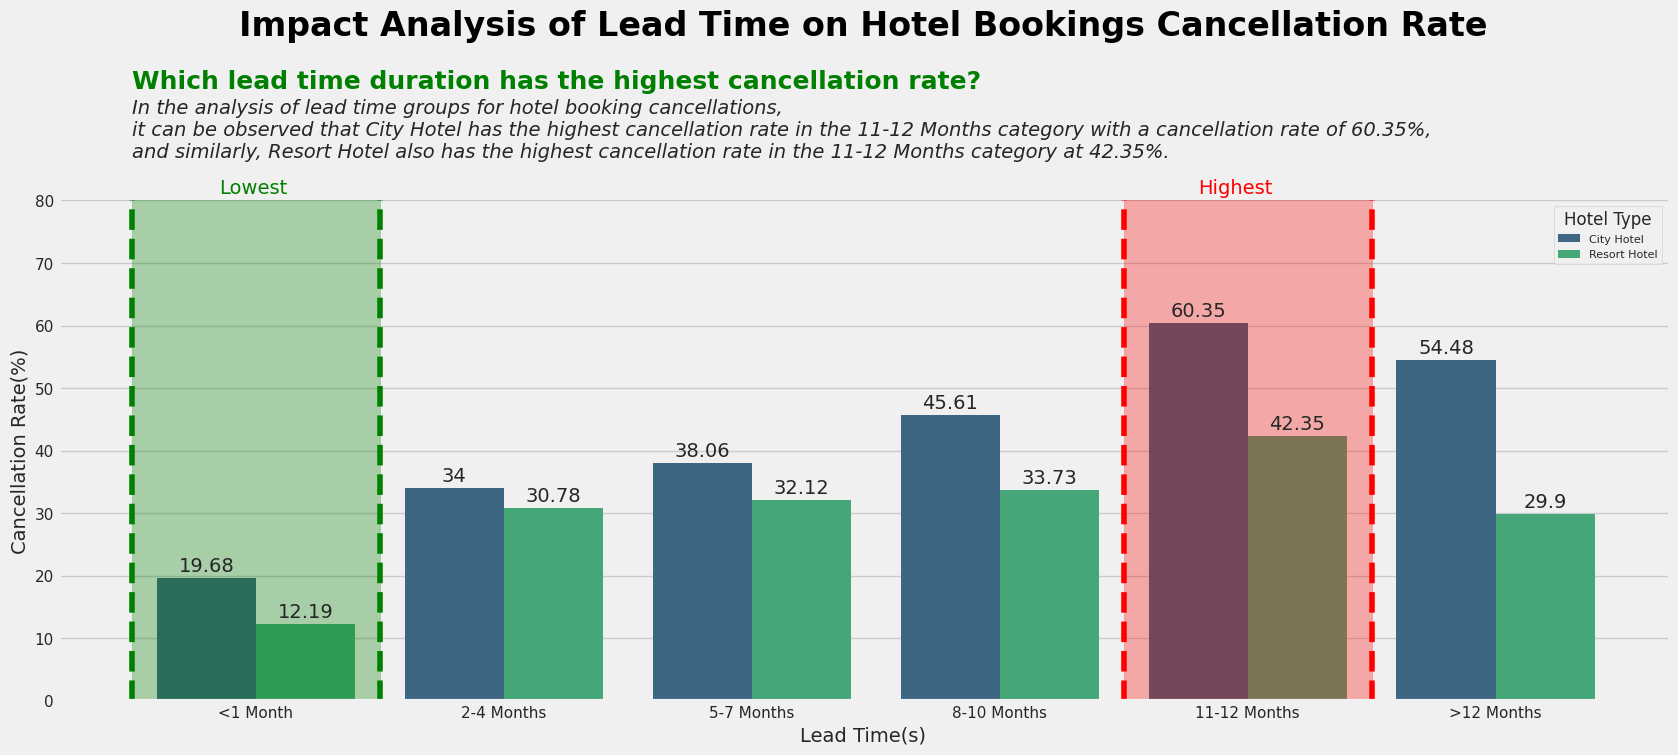

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate', fontsize=24, color='black', weight='bold', pad=65, y=1.15)

sns.barplot(x='lead_time_group', y='rate', data=df_agg5_plot, hue='hotel', edgecolor='none', palette='viridis', order=['<1 Month','2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'])

plt.xlabel('Lead Time(s)', fontsize=14)
plt.ylabel('Cancellation Rate(%)', fontsize=14)
plt.ylim(0, 80)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[80]], color='red', alpha=0.3)
plt.text(x=3.8, y=82, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[80]], color='green', alpha=0.3)
plt.text(x=-0.15, y=82, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

plt.text(x=-0.5, y=98, s='Which lead time duration has the highest cancellation rate?', fontsize=18, fontweight='bold', color='green')
plt.text(x=-0.5, y=87, s='In the analysis of lead time groups for hotel booking cancellations, \nit can be observed that City Hotel has the highest cancellation rate in the 11-12 Months category with a cancellation rate of 60.35%, \nand similarly, Resort Hotel also has the highest cancellation rate in the 11-12 Months category at 42.35%.', fontsize=14, fontstyle='italic')

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)

Seperti Interpretasi sebelumnya, terdapat dua jenis hotel, yaitu City Hotel dan Resort Hotel. Kedua jenis hotel ini memiliki karakteristik yang berbeda dalam hal pemesanan dan tingkat pembatalan terhadap jarak waktu pemesanan.

Data dibagi berdasarkan durasi waktu pemesanan, dengan beberapa kategori, yaitu < 1 Month, 2-4 Months, 5-7 Months, 8-10 Months, 11-12 Months, dan >12 Months. Dari Visualisasi di atas, Durasi waktu pemesanan memainkan peran penting dalam tingkat pembatalan, dengan beberapa durasi tinggal memiliki tingkat pembatalan yang lebih rendah daripada yang lain.

Salah satu temuan menarik adalah bahwa waktu pemesanan memiliki kecenderungan terhadap tingkat pembatalan. Semakin lama waktu pemesanan maka semakin tinggi pula kemungkinan untuk membatalkan pesanan. Tingkat pembatalan paling tinggi terdapat pada waktu pemesanan antara 11-12 Bulan. Yaitu sebesar 77.41% untuk City Hotel dan 43.5% untuk Resort Hotel. Data terendah terdapat pada waktu pemesanan kurang dari 1 bulan. Yaitu sebesar 22.47% untuk City Hotel dan 13.11% untuk Resort Hotel.

Dari interpretasi ini, perlu direncanakan strategi bisnis pemasaran dan pengelolaan hotel yang lebih baik, terutama dalam hal durasi pemesanan dan mengurangi pembatalannya.